# Predictive Anlytics on Bank Marketing Dataset.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [6]:
class Bank_Marketing:
    def __init__(self):
        self.bank_data = None  # Initializing the parameters to null...
        self.categorical_features = []
    
    def import_data(self, file_path):
        bank_data = None
        
        # Importing the bank data...
        bank_data = pd.read_csv(file_path)
        
        # assigning the bank data to instance variable for further computations..
        self.bank_data = bank_data
        
        return self.bank_data
    
    def determine_dimensions(self):
        return self.bank_data.shape
    
    def list_features(self):
        features = []
        
        features = list(self.bank_data.columns)
        return features
    
    def find_unique_values_of_categorical_features(self):
        self.categorical_features = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'marital', 'poutcome',
                               'deposit']
        
        # creating a dictionary of features and its types. (Key: Feature Name, Value: Unique feature types).
        dict_unique_features = dict()
        columns = list(self.bank_data.columns)
        
        # loop thru the columns....
        for feature in columns:
            temp_list = []   # create a temporary list...
            
            # check if the feature is categorical or not...
            if feature in self.categorical_features:
                temp_list = list(self.bank_data[feature].unique())   # Append the unique features in a list...
                dict_unique_features[feature] = temp_list            # assign it to the dictionary.
            else:
                pass
        
        return dict_unique_features
    
    def determine_frequency_distribution(self, categorical_variable, unique_values):
        # create a dictionary of categorical variable and its frequency...
        dict_frequency_distribution = dict()
        
        frequency_count = 0
        
        # looping thru the unique_values list...
        for value in unique_values:
            frequency_count = len(self.bank_data[self.bank_data[categorical_variable] == value])
            dict_frequency_distribution[value] = frequency_count
        
        return dict_frequency_distribution    
    
    

In [17]:
bm = Bank_Marketing()
bank_data = bm.import_data("C://Users//Shrey//Desktop//Coursera//Bank.csv")
bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [18]:
# determine the dimensions of the data...
bm.determine_dimensions()

(11162, 17)

## Inference: The dataset has 11162 observations and 17 features

In [20]:
# List the features of the dataset...
features = bm.list_features()
print("Features of the dataset are : ")
print(features)

Features of the dataset are : 
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [21]:
'''
Every dataset has both categorical and numerical features. Here this dataset has 17 features overall. Let's determine 
categorical and numerical features of the dataset.
'''
bank_data.info() # finds out basic info about the dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Categorical Data are:-

In [22]:
'''
1. Job: Type of Job a customer does.
2. marital: Marital status of the customer.
3. education: educational qualifications of the customer.
4. default: Does customer have any loan by default.
5. housing: Has customer taken any housing loan.
6. loan: Has customer taken any other loan
7. contact: Type of contact customer uses.
8. Poutcome: Previous outcome of the campaign.
9. Month: Month of the calender.
10.Deposit: Final Response of customer i.e target variable..
'''

'\n1. Job: Type of Job a customer does.\n2. marital: Marital status of the customer.\n3. education: educational qualifications of the customer.\n4. default: Does customer have any loan by default.\n5. housing: Has customer taken any housing loan.\n6. loan: Has customer taken any other loan\n7. contact: Type of contact customer uses.\n8. Poutcome: Previous outcome of the campaign.\n9. Month: Month of the calender.\n10.Deposit: Final Response of customer i.e target variable..\n'

### Numerical Data are:- 

In [ ]:
'''
1. Age: Age of the customer.
2. Balance: Balance of the customer.
3. Day: Day of the week.
4. Duration: Call duration with customer.
5. Campaign: No. of contacts performed during the current campaign for a client in the dataset.
6. Pdays: No. of days passed after the client was contacted from previous campaign.
7. Previous: No. of contacts performed before this campaign for a client in the dataset.
'''

In [23]:
# Now let's explore the different categories in each of the categorical data...
# retrieving the dictionary of categorical features and its unique values...
dict_categorical_features = bm.find_unique_values_of_categorical_features()

In [24]:
# different job types are:
unique_job_types = dict_categorical_features['job']
print("Unique Job types are : ")
print(unique_job_types)

print

unique_marital_status = dict_categorical_features['marital']
print("Different types of marital status are : ")
print(unique_marital_status)

print

unique_education_types = dict_categorical_features['education']
print("Different types of education are : ")
print(unique_education_types)

print

housing_loan_responses = dict_categorical_features['housing']
print("Responses of Housing Loans are : ")
print(housing_loan_responses)

print

other_loan_responses = dict_categorical_features['loan']
print("Responses of Other loans are : ")
print(other_loan_responses)

print

default_loan_responses = dict_categorical_features['default']
print("Responses on customers having default loans are : ")
print(default_loan_responses)

print 

different_contact_types = dict_categorical_features['contact']
print("Different Types of Contact are : ")
print(different_contact_types)

print 

response_of_previous_outcome = dict_categorical_features['poutcome']
print("Responses of previous outcomes of marketing campaigns are : ")
print(response_of_previous_outcome)

print

different_months = dict_categorical_features['month']
print("Different months of the calender are : ")
print(different_months)

print
customer_response = dict_categorical_features['deposit']
print("Responses of Customers are : ")
print(customer_response)

Unique Job types are : 
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']

Different types of marital status are : 
['married', 'single', 'divorced']

Different types of education are : 
['secondary', 'tertiary', 'primary', 'unknown']

Responses of Housing Loans are : 
['yes', 'no']

Responses of Other loans are : 
['no', 'yes']

Responses on customers having default loans are : 
['no', 'yes']

Different Types of Contact are : 
['unknown', 'cellular', 'telephone']

Responses of previous outcomes of marketing campaigns are : 
['unknown', 'other', 'failure', 'success']

Different months of the calender are : 
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']

Responses of Customers are : 
['yes', 'no']


In [25]:
# Now Let us determine the frequency distribution of each values of the categorical variable...
dict_job_freq = bm.determine_frequency_distribution('job',unique_job_types)
print("Frequency distribution of Job Types are : ")
print(dict_job_freq)

print

dict_educ_freq = bm.determine_frequency_distribution('education', unique_education_types)
print("Frequency distribution of Education types are : ")
print dict_educ_freq

print 

dict_marital_status_freq = bm.determine_frequency_distribution('marital', unique_marital_status)
print("Frequency distribution of Marital status are : ")
print(dict_marital_status_freq)

print

dict_contact_freq = bm.determine_frequency_distribution('contact', different_contact_types)
print("Frequency distribution of Contact types are : ")
print(dict_contact_freq)

print

dict_housing_loan_resp_freq = bm.determine_frequency_distribution('housing', housing_loan_responses)
print("Housing loan responses are : ")
print(dict_housing_loan_resp_freq)

print

dict_other_loans_resp_freq = bm.determine_frequency_distribution('loan', other_loan_responses)
print("Other loan responses are : ")
print(dict_other_loans_resp_freq)

print
dict_final_response_of_customer = bm.determine_frequency_distribution('deposit', customer_response)
print("Final Response of the customers are : ")
print(dict_final_response_of_customer)

Frequency distribution of Job Types are : 
{'management': 2566, 'retired': 778, 'entrepreneur': 328, 'unknown': 70, 'unemployed': 357, 'housemaid': 274, 'admin.': 1334, 'services': 923, 'self-employed': 405, 'student': 360, 'technician': 1823, 'blue-collar': 1944}

Frequency distribution of Education types are : 
{'unknown': 497, 'primary': 1500, 'tertiary': 3689, 'secondary': 5476}

Frequency distribution of Marital status are : 
{'single': 3518, 'married': 6351, 'divorced': 1293}

Frequency distribution of Contact types are : 
{'unknown': 2346, 'telephone': 774, 'cellular': 8042}

Housing loan responses are : 
{'yes': 5281, 'no': 5881}

Other loan responses are : 
{'yes': 1460, 'no': 9702}

Final Response of the customers are : 
{'yes': 5289, 'no': 5873}


### Inference: The Feature variables Housing and Response are distributed equally. In contact feature, telephone has lowest number of customers whereas cellular has highest number of customers. Unknown responses are found in features JobTypes, Education Types and Contact Types.

### Performing Exploratory Data Analysis

In [26]:
class Exploratory_Data_Analysis(Bank_Marketing):
    def __init__(self):
        self.bank_data = None
    
    # extract the data...
    def extract_data(self):
        self.bank_data = self.import_data("C://Users//Shrey//Desktop//Coursera//Bank.csv")
        return self.bank_data
    
    '''Data Exploration Segment...'''
    def return_array_of_variable(self, numeric_variable):
        final_array = np.array(self.bank_data[numeric_variable])
        return final_array
    
    def data_analysis_of_numeric_variables(self, numeric_variable):
        return self.bank_data[numeric_variable].describe() 
    
    def calculate_interquartile_range(self, quartile_1, quartile_3):
        interquartile_range = (quartile_3 - quartile_1)   # formula for calculating IQR...
        
        return interquartile_range
    
    def calculate_outlier_boundaries(self, quartile_1, quartile_3, interquartile_range):
        # Calculating the outlier boundaries...
        right_outlier_boundary = 0
        left_outlier_boundary = 0
        right_outlier_boundary = quartile_3 + (1.5 * interquartile_range)
        left_outlier_boundary = quartile_1 - (1.5 * interquartile_range)
        
        return left_outlier_boundary, right_outlier_boundary
    
    # method to calculate percentile...
    def calculate_required_percentile(self, percentile_number, array):
        # Calculating the right percentile number...
        sorted_list = np.sort(array)
    
        # calculate the percentile score....
        percentile_score_index = int(math.ceil(float(len(sorted_list)) * float(percentile_number)/100.0)) - 1
    
        return array[percentile_score_index]


In [27]:
eda = Exploratory_Data_Analysis()
bank_data = eda.extract_data()
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Performing Exploratory Analysis of Numeric Variables...

In [29]:
analysis_of_age = eda.data_analysis_of_numeric_variables('age')
print "Basic Analysis of Age Variable is : "
print analysis_of_age

# Calculating interquartile range of Age variable...
quartile1 = analysis_of_age.loc['25%']
quartile3 = analysis_of_age.loc['75%']

print 

interquartile_range = eda.calculate_interquartile_range(quartile1, quartile3)
print("Interquartile Range Of Age Variable is : ")
print(interquartile_range)

print("Quartile 1 is : ", quartile1)
print("Quartile 3 is : ", quartile3)

# Now calculating outliers...
left_outlier_boundary, right_outlier_boundary = eda.calculate_outlier_boundaries(quartile1, quartile3, interquartile_range)
print("Left Outlier Boundary is : ", left_outlier_boundary)
print("Right Outlier Boundary is : ", right_outlier_boundary)

print

# Now calculating those values which are less than left boundary and which are greater than right outlier boundary...
print("Possible outliers are : ")
data1 = bank_data[bank_data['age'] < left_outlier_boundary]
data2 = bank_data[bank_data['age'] > right_outlier_boundary]

print("From the left : ",list(data1['age']))
print("From the right : ",list(data2['age']))

Basic Analysis of Age Variable is : 
count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

Interquartile Range Of Age Variable is : 
17.0
('Quartile 1 is : ', 32.0)
('Quartile 3 is : ', 49.0)
('Left Outlier Boundary is : ', 6.5)
('Right Outlier Boundary is : ', 74.5)

Possible outliers are : 
('From the left : ', [])
('From the right : ', [75, 85, 90, 85, 83, 76, 83, 77, 77, 76, 78, 95, 78, 75, 76, 85, 83, 79, 82, 79, 75, 76, 82, 77, 86, 76, 79, 83, 77, 84, 83, 75, 77, 76, 77, 87, 76, 92, 78, 82, 76, 77, 76, 81, 75, 80, 87, 76, 82, 77, 76, 81, 75, 78, 80, 86, 79, 79, 81, 75, 84, 87, 85, 79, 92, 77, 81, 80, 77, 78, 76, 80, 77, 76, 75, 82, 80, 78, 90, 83, 80, 82, 80, 84, 86, 75, 76, 77, 76, 77, 80, 77, 78, 75, 84, 78, 80, 80, 79, 86, 93, 82, 82, 77, 93, 77, 75, 80, 84, 75, 78, 81, 81, 77, 78, 75, 77, 77, 77, 78, 77, 79, 78, 75, 80, 76, 78, 7

### Inference from Age Variable
* Average age of the people in the dataset is ~41 with std of 10.61
   * Min. age is 18
   * Max. age is 95
   * quantile 75%(percentile) refers that 75 percentage of the people have 49 or less  age.
   * As 95 is max, there is great chance that its a outlier "Q3 + 17*(3/2) = 74.5". So anything greater than 74.5 is outlier.

In [30]:
# doing analysis of balance variable...
balance_variable = eda.data_analysis_of_numeric_variables('balance')
print "Basic analysis of balance variable is : "
balance_variable

# Calculating interquartile range of Age variable...
quartile1 = balance_variable.loc['25%']
quartile3 = balance_variable.loc['75%']

print 

interquartile_range = eda.calculate_interquartile_range(quartile1, quartile3)
print("Interquartile Range Of Balance Variable is : ")
print(interquartile_range)

print("Quartile 1 is : ", quartile1)
print("Quartile 3 is : ", quartile3)

# Now calculating outliers...
left_outlier_boundary, right_outlier_boundary = eda.calculate_outlier_boundaries(quartile1, quartile3, interquartile_range)
print("Left Outlier Boundary is : ", left_outlier_boundary)
print("Right Outlier Boundary is : ", right_outlier_boundary)

print

# Now calculating those values which are less than left boundary and which are greater than right outlier boundary...
print("Possible outliers are : ")
data1 = bank_data[bank_data['balance'] < left_outlier_boundary]
data2 = bank_data[bank_data['balance'] > right_outlier_boundary]

print("From the left : ",list(data1['balance']))
print("From the right : ",list(data2['balance']))

Basic analysis of balance variable is : 

Interquartile Range Of Balance Variable is : 
1586.0
('Quartile 1 is : ', 122.0)
('Quartile 3 is : ', 1708.0)
('Left Outlier Boundary is : ', -2257.0)
('Right Outlier Boundary is : ', 4087.0)

Possible outliers are : 
('From the left : ', [-3058, -2282, -6847, -2712])
('From the right : ', [5090, 7180, 5291, 4580, 10576, 4393, 4438, 4170, 4822, 4499, 4665, 5773, 6840, 12956, 4692, 7606, 14481, 5724, 4136, 6281, 5839, 7561, 4844, 5345, 11008, 4930, 9103, 6360, 4145, 9004, 4758, 5024, 10685, 5613, 5361, 14282, 7098, 5389, 4108, 4291, 6822, 7138, 4396, 34646, 4436, 10052, 9827, 6170, 8029, 8163, 4414, 7135, 4570, 5188, 17297, 7084, 5603, 5303, 8749, 5346, 5514, 5254, 10250, 12026, 7506, 5041, 6619, 12857, 5060, 4152, 5447, 5115, 4508, 4646, 11887, 5037, 8781, 5561, 4189, 12737, 4654, 6402, 6993, 4420, 11462, 6843, 5806, 20138, 4333, 7773, 6888, 5461, 7119, 18508, 5639, 12519, 4254, 7049, 7195, 4117, 8629, 4536, 4148, 4119, 22520, 7724, 4329, 4465,

### Inference from Balance Variable 
* Average balance of the people in the dataset is (approx)1528.53 with std of 3255.41, as standard deviation is quite huge it means that balance is wide spread across the dataset.
   * Min. balance is -6847
   * Max. balance is 81204
   * quantile 75%(percentile) refers that 75 percentage of the people have 1708 or less balance.
   * while comparing with 75% quantile, 81204 is very huge and its a outlier data point.

In [32]:
# Now working on duration variable...
analysis_of_duration = eda.data_analysis_of_numeric_variables('duration')
print "Analysis of the duration variable is : "
print analysis_of_duration

# Calculating interquartile range of Age variable...
quartile1 = analysis_of_duration.loc['25%']
quartile3 = analysis_of_duration.loc['75%']

print 

interquartile_range = eda.calculate_interquartile_range(quartile1, quartile3)
print("Interquartile Range Of Duration Variable is : ")
print(interquartile_range)

print("Quartile 1 is : ", quartile1)
print("Quartile 3 is : ", quartile3)

# Now calculating outliers...
left_outlier_boundary, right_outlier_boundary = eda.calculate_outlier_boundaries(quartile1, quartile3, interquartile_range)
print("Left Outlier Boundary is : ", left_outlier_boundary)
print("Right Outlier Boundary is : ", right_outlier_boundary)

print

# Now calculating those values which are less than left boundary and which are greater than right outlier boundary...
print("Possible outliers are : ")
data1 = bank_data[bank_data['duration'] < left_outlier_boundary]
data2 = bank_data[bank_data['duration'] > right_outlier_boundary]

print("From the left : ",list(data1['duration']))
print("From the right : ",list(data2['duration']))

Analysis of the duration variable is : 
count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

Interquartile Range Of Duration Variable is : 
358.0
('Quartile 1 is : ', 138.0)
('Quartile 3 is : ', 496.0)
('Left Outlier Boundary is : ', -399.0)
('Right Outlier Boundary is : ', 1033.0)

Possible outliers are : 
('From the left : ', [])
('From the right : ', [1042, 1467, 1389, 1201, 1297, 1574, 1689, 1102, 1084, 1119, 1120, 2087, 1120, 1692, 1346, 1721, 1553, 1328, 1125, 1423, 1162, 1224, 1156, 1052, 1867, 1143, 1340, 1297, 1193, 1064, 1187, 1622, 1205, 1882, 1334, 1777, 1182, 1045, 1063, 1392, 1681, 1697, 1349, 1392, 1560, 1234, 1272, 1063, 1051, 3094, 1560, 1183, 1730, 1207, 1363, 1109, 1133, 1269, 1097, 1236, 1343, 1980, 1044, 1193, 1036, 1068, 1173, 1045, 2456, 1363, 1336, 1449, 1446, 1149, 1123, 1558, 1053, 1276, 2653, 1085, 1055, 38

### Inference on Duration Variable.
 * Average duration of the people speaking in the dataset is (approx)371 with std of 347, as standard deviation is quite huge it means that duration is wide spread across the dataset.
   * Min. duration is 2
   * Max. duration is 3881
   * quantile 75%(percentile) refers that 75 percentage of the people spoke for 496 seconds or less.
   * while comparing with 75% quantile, 3881 is a outlier data point.

In [33]:
# Analysis of Pdays..
analysis_of_pdays = eda.data_analysis_of_numeric_variables('pdays')
print "Analysis of pdays is : "
analysis_of_pdays

Analysis of pdays is : 


count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

### Inference on Pdays variable...
  * Average no. of days passed after the client was contacted from previous campaign in the dataset is (approx)51.33 with std of 108.75.
   * Min. pdays is -1
   * Max. pdays is 854
   * quantile 75%(percentile),for 75% of records it is 20.75 days, which means the Client was frequently contacted after 20.5 days.



In [34]:
# Analysis of Campaign variable...
analysis_of_campaign = eda.data_analysis_of_numeric_variables('campaign') 
print "Analysis of Campaign Variable is : "
print analysis_of_campaign

# Calculating quartiles...
quartile_1 = analysis_of_campaign.loc['25%']
quartile_3 = analysis_of_campaign.loc['75%']

# calculating interquartile range...
interquartile_range = eda.calculate_interquartile_range(quartile_1, quartile_3)

print

print("Quartile 1 is : ", quartile_1)
print("Quartile 3 is : ", quartile_3)
print
print "Interquartile Range is : ", interquartile_range

# Now calculating outliers...
left_outlier_boundary, right_outlier_boundary = eda.calculate_outlier_boundaries(quartile1, quartile3, interquartile_range)
print("Left Outlier Boundary is : ", left_outlier_boundary)
print("Right Outlier Boundary is : ", right_outlier_boundary)

print

# Now calculating those values which are less than left boundary and which are greater than right outlier boundary...
print("Possible outliers are : ")
data1 = bank_data[bank_data['campaign'] < left_outlier_boundary]
data2 = bank_data[bank_data['campaign'] > right_outlier_boundary]

print("From the left : ",list(data1['campaign']))
print("From the right : ",list(data2['campaign']))

Analysis of Campaign Variable is : 
count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

('Quartile 1 is : ', 1.0)
('Quartile 3 is : ', 3.0)

Interquartile Range is :  2.0
('Left Outlier Boundary is : ', 135.0)
('Right Outlier Boundary is : ', 499.0)

Possible outliers are : 
('From the left : ', [1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 4, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 2, 2, 4, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2, 4, 1, 4, 2, 1, 2, 1, 4, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 3, 4, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 6, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 3, 5, 4, 4, 1, 2, 1, 4, 3, 2, 6, 5, 1, 1, 2, 1, 2, 1, 4, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 3, 3, 8, 2, 1, 1, 3, 3, 6, 3, 2, 2, 11, 1, 2, 2, 3, 2, 4, 2, 6, 4, 3, 3, 2, 5, 1, 3, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 9, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1,

### Inference from Campaign Variable
 * Average no. of contacts performed during the current campaign for a client in the dataset is (approx)2.50 with std of 2.72.
   * Min. balance is 1
   * Max. balance is 63
   * quantile 75%(percentile),for 75% of records, 3 times the client has been contacted in the current campaign for a client.
   * while comparing with 75% quantile,63 is a outlier data point.

In [35]:
# Analysis of the previous variable...
analysis_of_previous = eda.data_analysis_of_numeric_variables('previous')
analysis_of_previous

count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64

### Inference from Previous Variable...
 * Average no. of contacts performed before this campaign for a client in the dataset is (approx)0.83 with std of 2.29.
   * Min. balance is 0.
   * Max. balance is 58
   * quantile 75%(percentile),for 75% of records, 1 times the client has been contacted before this campaign.
   * while comparing with 75% quantile,58 is a outlier data point.

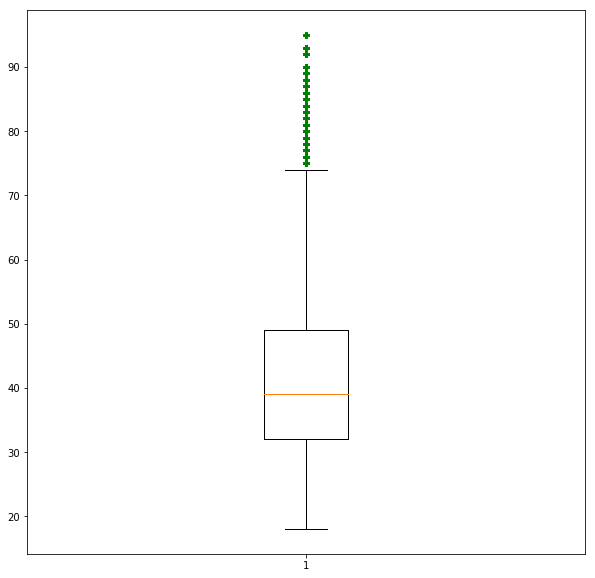

In [36]:
age_list = list(eda.return_array_of_variable('age'))
balance_list = list(eda.return_array_of_variable('balance'))
duration_list = list(eda.return_array_of_variable('duration'))
pdays_list = list(eda.return_array_of_variable('pdays'))
campaign_list = list(eda.return_array_of_variable('campaign'))
previous_list = list(eda.return_array_of_variable('previous'))

#data_to_be_plotted = [age_list, balance_list, duration_list, pdays_list, campaign_list, previous_list]

# Plot for Age Variable...
plt.figure(figsize=(10,10))
plt.boxplot(age_list,0, 'gP')
plt.show()

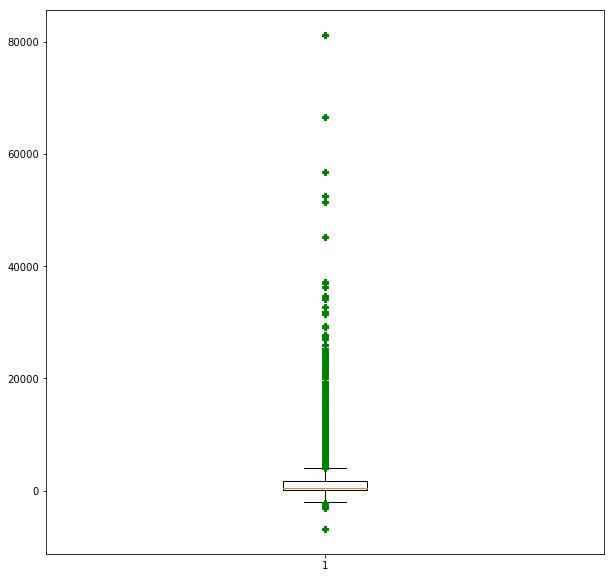

In [37]:
# Plot for Balance Variable...
plt.figure(figsize=(10,10))
plt.boxplot(balance_list,0, 'gP')
plt.show()

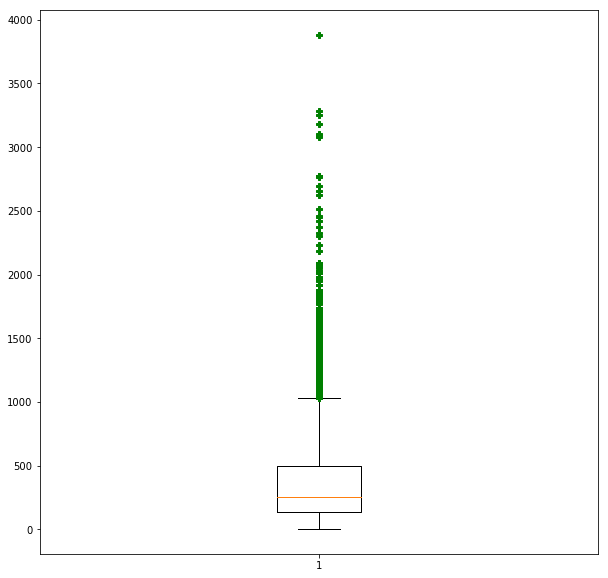

In [38]:
# Plot for duratio variable...
plt.figure(figsize=(10,10))
plt.boxplot(duration_list,0, 'gP')
plt.show()

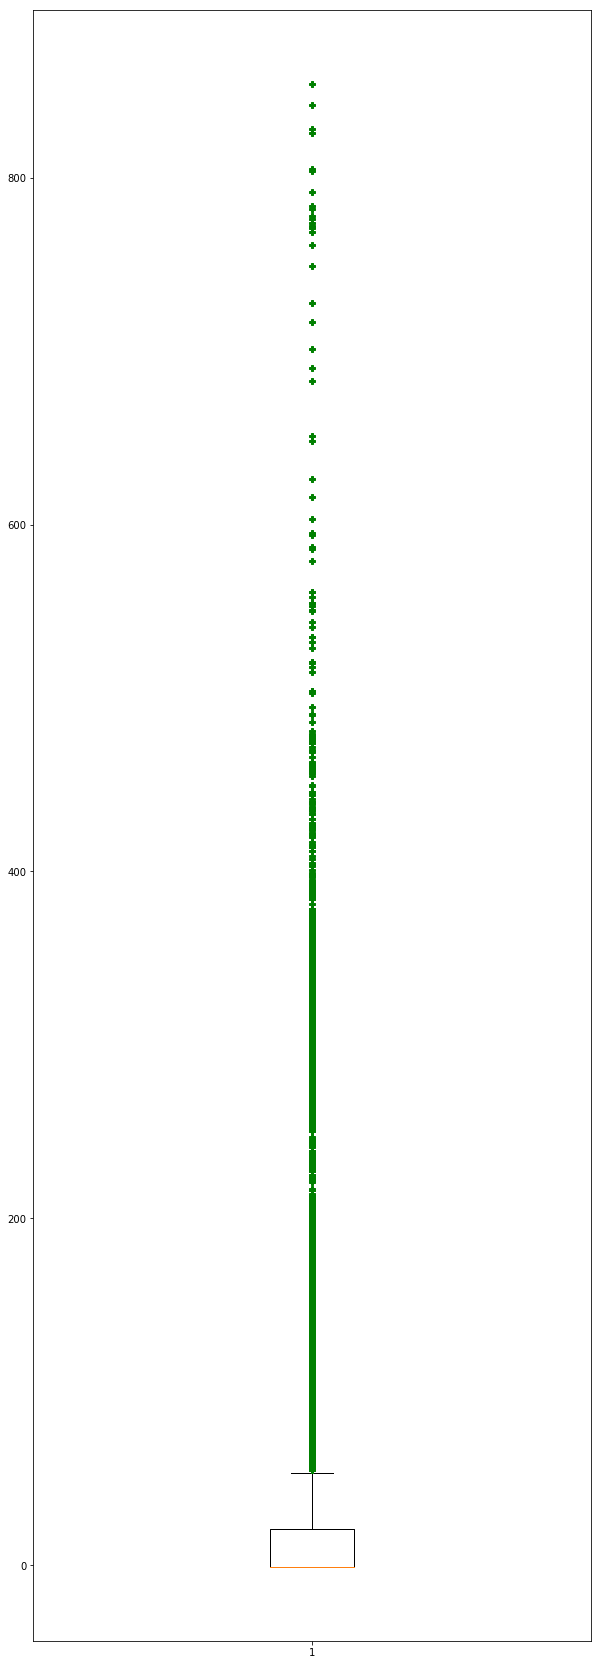

In [39]:
# pdays list....
plt.figure(figsize=(10,30))
plt.boxplot(pdays_list,0, 'gP')
plt.show()

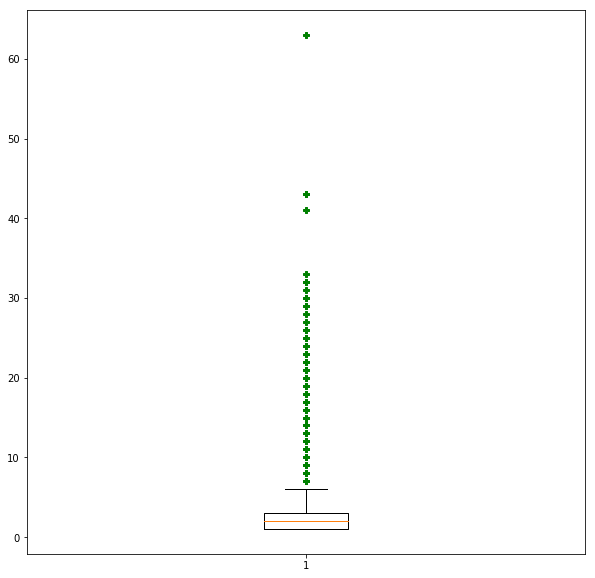

In [40]:
# campaign list..
plt.figure(figsize=(10,10))
plt.boxplot(campaign_list,0, 'gP')
plt.show()

#### Inference from these box plots
Above boxplot suggest how the data is spread across the dataset Most of the data is lying above the 3rd quantile by multiplication factor of 1.5.

## Performing Bi-Variate Analysis

In [41]:
class Bivariate_Analysis(Bank_Marketing):
    def __init__(self):
        self.bank_data = None
    
    # extract the data...
    def extract_data(self):
        self.bank_data = self.import_data("C://Users//Shrey//Desktop//Coursera//Bank.csv")
        return self.bank_data
    
    # function to perform crosstabulation...
    def perform_crosstab(self, series1, series2):
        crosstab_data = pd.crosstab(series1, series2)
        
        crosstab_data = crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0)
        
        return crosstab_data
    
    def visualize_crosstab_data(self, crosstab_data):
        # visualizing the data...
        crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = False, 
                                                                   color=['red','green'], 
                                                                   grid=False, figsize=(15,5))
        # Show the data...
        plt.show()
        
    def perform_correlation(array1, array2):
        pass
        

Cross Tabulated Data between Housing and Deposit is : 
deposit        no       yes
housing                    
no       0.429689  0.570311
yes      0.633592  0.366408


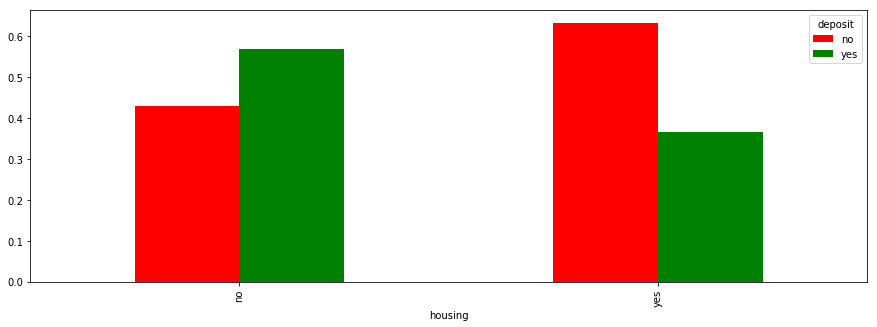

In [42]:
biv = Bivariate_Analysis()

# Extract the bank data...
bank_data = biv.extract_data()

# perform crosstab on data between housing and deposit...
crosstab_data = biv.perform_crosstab(bank_data.housing, bank_data.deposit)

print "Cross Tabulated Data between Housing and Deposit is : "
print crosstab_data

# visualize the result...
biv.visualize_crosstab_data(crosstab_data)

## Inference: 
* There are 57% of people who have responded to term deposit offer and they do not have housing loan...
* There are 43% of people who have not responded to the term deposit offer and do not have housing loan

*---------------------------------------------------------------------------------------------------------*

* There are 63% of people who have not responded to the term deposit offer and who have a housing loan..
* There are 37% of people who have responded to the term deposit offer and they have a housing loan..

** As per our target i.e finding the percentage of people who respond to the term deposit offer, we see that when people have a housing loan, the response percentage to the term deposit offer is slightly lesser as compared to people who do not have a housing loan.


Cross tabulation between Loan and Deposit : 
deposit        no       yes
loan                       
no       0.504741  0.495259
yes      0.668493  0.331507


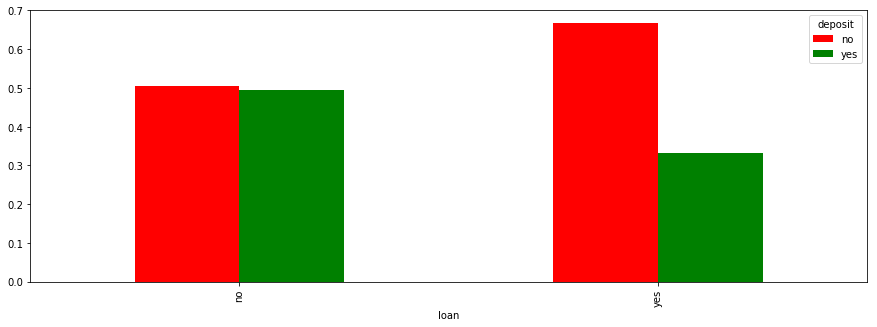

In [43]:
# Performing crosstab between loan and deposit...
crosstab_data = biv.perform_crosstab(bank_data.loan, bank_data.deposit)

print "Cross tabulation between Loan and Deposit : "
print crosstab_data

# visualize the result...
biv.visualize_crosstab_data(crosstab_data)

### Inference:
* There are 50% of people who have responded to term deposit offer and they do not have any other loan...
* There are 50% of people who have not responded to the term deposit offer and do not have any other loan

*---------------------------------------------------------------------------------------------------------*

* There are 66% of people who have not responded to the term deposit offer and who have any other loan..
* There are 34% of people who have responded to the term deposit offer and they have any other loan..

** As per our target i.e finding the percentage of people who respond to the term deposit offer, we see that when people have any other loan, the response percentage to the term deposit offer is half as compared to people who do not have any  other loan.


Cross tabulation between Default and Deposit : 
deposit        no       yes
default                    
no       0.523649  0.476351
yes      0.690476  0.309524


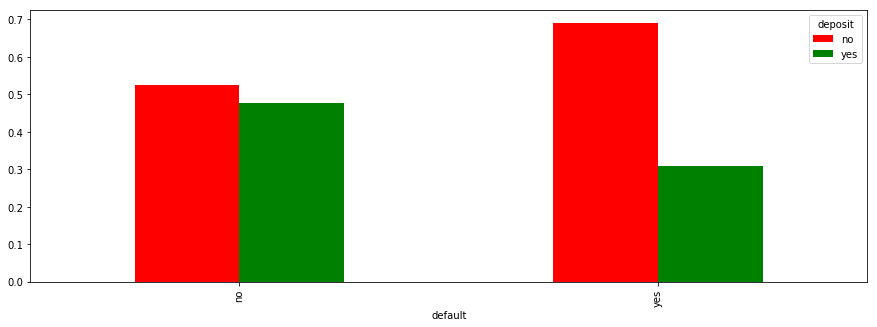

In [44]:
# Performing crosstab between loan and deposit...
crosstab_data = biv.perform_crosstab(bank_data.default, bank_data.deposit)

print "Cross tabulation between Default and Deposit : "
print crosstab_data

# visualize the result...
biv.visualize_crosstab_data(crosstab_data)

### Common Inference from above analysis:
* If there is any kind of loan lets say housing or personal or any default loan, then in that category the percentage of respondents for term deposit offer are lower as compared to percentage of respondents who do not have any other loan. 

## Bivariate Analysis:

In [45]:
class Multivariate_Analysis(Bank_Marketing):
    def __init__(self):
        self.bank_data = None
        
    # extract the data...
    def extract_data(self):
        self.bank_data = self.import_data("C://Users//Shrey//Desktop//Coursera//Bank.csv")
        return self.bank_data
    
    # function to perform crosstabulation...
    def perform_crosstab(self, series1, series2):
        crosstab_data = pd.crosstab(series1, series2)
        
        crosstab_data = crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0)
        
        return crosstab_data
    
    def visualize_crosstab_data(self, crosstab_data):
        # visualizing the data...
        crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = False, 
                                                                   color=['red','green'], 
                                                                   grid=False, figsize=(15,5))
        # Show the data...
        plt.show()

Cross Tab Data between Education and Deposit is : 
deposit          no       yes
education                    
primary    0.606000  0.394000
secondary  0.552593  0.447407
tertiary   0.458932  0.541068
unknown    0.492958  0.507042


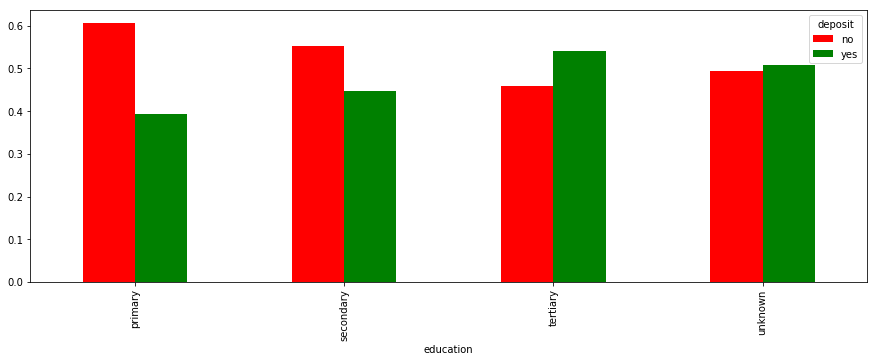

In [46]:
mul = Multivariate_Analysis()

# Extract bank data...
bank_data = mul.extract_data()

crosstab_data = mul.perform_crosstab(bank_data.education, bank_data.deposit)

print "Cross Tab Data between Education and Deposit is : "
print crosstab_data

mul.visualize_crosstab_data(crosstab_data)

### Inference:
* Customers with Primary Education have a higher percentage of rejecting the term deposit offer.
* As the education of the customer is increasing from Primary to secondary and to tertiary, the percentage of acceptance of term deposit offer is also increasing slowly from 40% to 45% and then to 55%.
* However there is one category called the unknown, which means that the type of education of the customer is not known here and in this analysis the Unknown category holds an equally good chance of acceptance or rejection of offer. Due to this unknown variable we cannot fully infer about the cross tabulation results between education and deposit.

Cross Tab Data between Marital Status and Deposit is : 
deposit         no       yes
marital                     
divorced  0.518948  0.481052
married   0.566210  0.433790
single    0.456509  0.543491


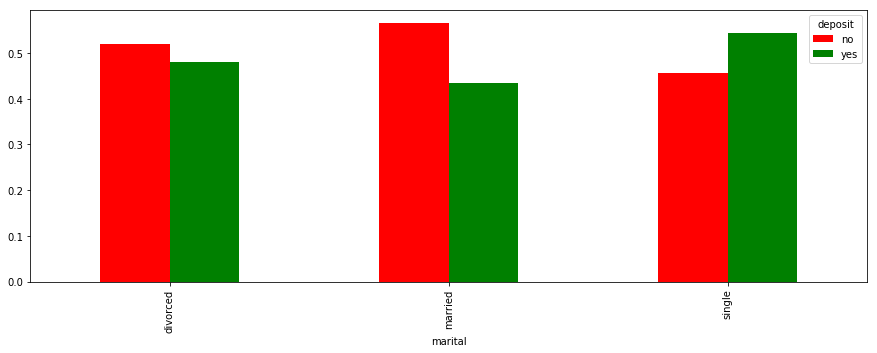

In [47]:
crosstab_data = mul.perform_crosstab(bank_data.marital, bank_data.deposit)

print "Cross Tab Data between Marital Status and Deposit is : "
print crosstab_data

mul.visualize_crosstab_data(crosstab_data)

### Inference from the Data:
* Here we can infer that customers who are divorced or who are single have a slightly higher chance of accepting the term deposit offer than people who are married and settled. This increase is not significant though.

Cross Tab Data between Job and Deposit is : 
deposit              no       yes
job                              
admin.         0.526987  0.473013
blue-collar    0.635802  0.364198
entrepreneur   0.625000  0.375000
housemaid      0.602190  0.397810
management     0.492985  0.507015
retired        0.336761  0.663239
self-employed  0.538272  0.461728
services       0.600217  0.399783
student        0.252778  0.747222
technician     0.539221  0.460779
unemployed     0.434174  0.565826
unknown        0.514286  0.485714


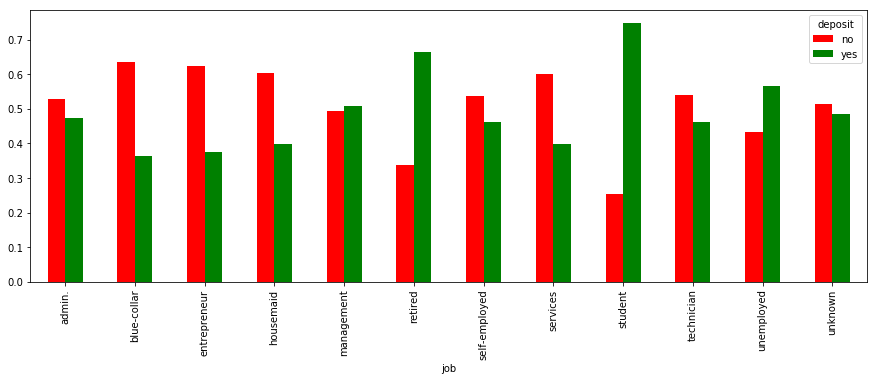

In [48]:
# Analysis of Job vs deposit...
crosstab_data = mul.perform_crosstab(bank_data.job, bank_data.deposit)

print "Cross Tab Data between Job and Deposit is : "
print crosstab_data

mul.visualize_crosstab_data(crosstab_data)

## Inference:
1. Customer possessing Jobs like admin, blue-collar, entreprenuership and housemaid have a less percentage of acceptance of term deposit offer.

2. Another interesting observation is that customers who are self-employed or students or management or one who are retired are more likely to respond to the term deposit offer.

3. Another category which is unknown gives us the idea that these customers have a 50% chance of acceptance of term deposit offer.

In [64]:
# The above inferences were obtained from the categorical features. Now let's dwell into Data preparation..
class Data_Preparation(Bank_Marketing):
    def __init__(self):
        self.bank_data = None
    
    def extract_data(self):
        # extract the data...
        self.bank_data = self.import_data("C://Users//Shrey//Desktop//Coursera//Bank.csv")
        return self.bank_data
    
    # method to classify age variable...
    def classify_age(self):
        # introducing new columns as Adult, Middle-Aged and Old...
        self.bank_data['Adult'] = 0
        self.bank_data['Middle-Aged'] = 0
        self.bank_data['Old'] = 0
        
        # Between 18 to 35 classify as Adult, between 36 to 60 classify as middle aged and above 60 classify as old.
        bool_classify_adult = (self.bank_data['age'] >= 18) & (self.bank_data['age'] <= 35)
        bool_classify_middle_age = (self.bank_data['age'] >= 36) & (self.bank_data['age'] <= 60)
        bool_classify_old = (self.bank_data['age'] > 60)
        
        # Assign value 1 to the customers who fall under the adult category...
        self.bank_data.loc[bool_classify_adult, 'Adult'] = 1
        
        # Assign value 1 to middle aged category people...
        self.bank_data.loc[bool_classify_middle_age, 'Middle-Aged'] = 1
        
        # Assign 1 to old category people...
        self.bank_data.loc[bool_classify_old, 'Old'] = 1
        
        return self.bank_data

    # Method to classify education as Primary, Secondary, tertiary and unknown...
    def classify_education(self):
        self.bank_data['Primary'] = 0
        self.bank_data['Secondary'] = 0
        self.bank_data['Tertiary'] = 0
        self.bank_data['Unknown'] = 0
        
        # Condition to classify the data....
        classify_primary = (self.bank_data['education'] == 'primary')
        classify_secondary = (self.bank_data['education'] == 'secondary')
        classify_tertiary = (self.bank_data['education'] == 'tertiary')
        classify_unknown = (self.bank_data['education'] == 'unknown')
        
        # Assigning the values as per the classification...
        self.bank_data.loc[classify_primary, 'Primary'] = 1
        self.bank_data.loc[classify_secondary, 'Secondary'] = 1
        self.bank_data.loc[classify_tertiary, 'Tertiary'] = 1
        self.bank_data.loc[classify_unknown, 'Unknown'] = 1
        
        return self.bank_data
        
    def classify_marital_status(self):
        # Classifying the marital status...
        self.bank_data['Single'] = 0
        self.bank_data['Married'] = 0
        self.bank_data['Divorced'] = 0
        
        classify_single = self.bank_data['marital'] == 'single'
        classify_married = self.bank_data['marital'] == 'married'
        classify_divorced = self.bank_data['marital'] == 'divorced'
        
        self.bank_data.loc[classify_single, 'Single'] = 1
        self.bank_data.loc[classify_married, 'Married'] = 1
        self.bank_data.loc[classify_divorced, 'Divorced'] = 1
        
        return self.bank_data
        
    def classify_jobs(self):
        # Method to classify the jobs...
        self.bank_data.loc[self.bank_data['job'] == "management",'job'] = 1
        self.bank_data.loc[self.bank_data['job'] == "technician",'job'] = 2
        self.bank_data.loc[self.bank_data['job'] == "entrepreneur",'job'] = 3
        self.bank_data.loc[self.bank_data['job'] == "blue-collar",'job'] = 4
        self.bank_data.loc[self.bank_data['job'] == "retired",'job'] = 5
        self.bank_data.loc[self.bank_data['job'] == "admin.",'job'] = 6
        self.bank_data.loc[self.bank_data['job'] == "services",'job'] = 7
        self.bank_data.loc[self.bank_data['job'] == "self-employed",'job'] = 8
        self.bank_data.loc[self.bank_data['job'] == "unemployed",'job'] = 9
        self.bank_data.loc[self.bank_data['job'] == "student",'job'] = 10
        self.bank_data.loc[self.bank_data['job'] == "housemaid",'job'] = 11
        self.bank_data.loc[self.bank_data['job'] == "unknown",'job'] = 12
        
        return self.bank_data
    
    # Method to classify balance...
    def classify_balance(self):
        self.bank_data['Neg_Balance'] = 0
        self.bank_data['No_Balance'] = 0
        self.bank_data['Pos_Balance'] = 0
    
        self.bank_data.loc[self.bank_data['balance']<0,'Neg_Balance'] = 1
        self.bank_data.loc[self.bank_data['balance'] == 0,'No_Balance'] = 1
        self.bank_data.loc[(self.bank_data['balance'] >= 1) & (self.bank_data['balance'] <= 100),'Pos_Balance'] = 1
        self.bank_data.loc[(self.bank_data['balance'] >= 101) & (self.bank_data['balance'] <= 500),'Pos_Balance'] = 2
        self.bank_data.loc[(self.bank_data['balance'] >= 501) & (self.bank_data['balance'] <= 2000),'Pos_Balance'] = 3
        self.bank_data.loc[(self.bank_data['balance'] >= 2001) & (self.bank_data['balance'] <= 10000),'Pos_Balance'] = 4
        self.bank_data.loc[self.bank_data['balance'] >= 10001,'Pos_Balance'] = 5
        
        return self.bank_data
    
    # Method to classify campaign data...
    def classify_campaign(self):
        self.bank_data.loc[self.bank_data['campaign'] == 1,'campaign'] = 1
        self.bank_data.loc[(self.bank_data['campaign'] >= 2) & (self.bank_data['campaign'] <= 3),'campaign'] = 2
        self.bank_data.loc[self.bank_data['campaign'] >= 4,'campaign'] = 3
        
        return self.bank_data
    
    # Method to classify pdays...
    def classify_pdays(self):
        self.bank_data['pdays_not_contacted'] = 0
        self.bank_data['months_passed'] = 0
        self.bank_data.loc[self.bank_data['pdays'] == -1 ,'pdays_not_contacted'] = 1
        self.bank_data['months_passed'] = self.bank_data['pdays']/30
        self.bank_data.loc[(self.bank_data['months_passed'] >= 0) & (self.bank_data['months_passed'] <=2) ,'months_passed'] = 1
        self.bank_data.loc[(self.bank_data['months_passed'] > 2) & (self.bank_data['months_passed'] <=6),'months_passed'] = 2
        self.bank_data.loc[self.bank_data['months_passed'] > 6 ,'months_passed'] = 3
        
        return self.bank_data
    
    def classify_previous(self):
        # Classify the previous data...
        self.bank_data['Not_Contacted'] = 0
        self.bank_data['Contacted'] = 0
        self.bank_data.loc[self.bank_data['previous'] == 0 ,'Not_Contacted'] = 1
        self.bank_data.loc[(self.bank_data['previous'] >= 1) & (self.bank_data['pdays'] <=99) ,'Contacted'] = 1
        self.bank_data.loc[self.bank_data['previous'] >= 100,'Contacted'] = 2
        
        return self.bank_data
    
    def classify_duration(self):
        # Classify duration on the basis of time attented by client...
        self.bank_data['five_minutes'] = 0
        self.bank_data['Between five and ten min'] = 0
        self.bank_data['More than ten min'] = 0
        
        bool_classify_five_min = self.bank_data['duration'] <= 5
        bool_classify_five_to_ten_min = (self.bank_data['duration'] > 5) & (self.bank_data['duration'] <= 10)
        bool_classify_more_than_ten_min = self.bank_data['duration'] > 10
        
        self.bank_data.loc[bool_classify_five_min, 'five_minutes'] = 1
        self.bank_data.loc[bool_classify_five_to_ten_min, 'Between five and ten min'] = 1
        self.bank_data.loc[bool_classify_more_than_ten_min, 'More than ten min'] = 1
        
        return self.bank_data
        
    def classify_binary_data(self):
        # Classifying the response of binary data and converting them into 1 and 0
        self.bank_data['deposit'].replace(('yes', 'no'), (1,0), inplace=True)
        self.bank_data.housing.replace(('yes', 'no'), (1,0), inplace=True)
        self.bank_data.loan.replace(('yes', 'no'), (1,0), inplace=True)
        self.bank_data.default.replace(('yes', 'no'),(1,0), inplace = True)
        
        # Converting months..
        self.bank_data.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov'
                                      , 'dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
        
        # Converting contact details...
        self.bank_data.contact.replace(('telephone', 'cellular', 'unknown'), (1,2,3), inplace=True)
        
        return self.bank_data
        
    
    # method to perform crosstab analysis...
    def perform_crosstab_analysis(self, series1, series2):
        crosstab_data = pd.crosstab(series1, series2)
        
        crosstab_data = crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0)
        
        return crosstab_data
    
    # method to visualize the crosstab data...
    def visualize_crosstab_data(self, crosstab_data):
        # visualizing the data...
        crosstab_data.div(crosstab_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked = False, 
                                                                   color=['red','green'], 
                                                                   grid=True, figsize=(15,5))
        # Show the data...
        plt.show()
            

Cross tab Data is :
deposit         0         1
Adult                      
0        0.543513  0.456487
1        0.499199  0.500801
Visualizing the cross tab data : 


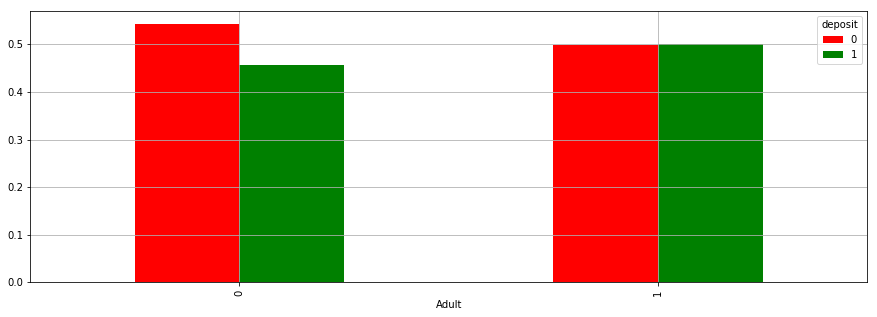

In [65]:
data_prep = Data_Preparation()
bank_data = data_prep.extract_data()
bank_data = data_prep.classify_age()
bank_data = data_prep.classify_education()
bank_data = data_prep.classify_marital_status()
bank_data = data_prep.classify_jobs()
bank_data = data_prep.classify_balance()
bank_data = data_prep.classify_campaign()
bank_data = data_prep.classify_pdays()
bank_data = data_prep.classify_previous()
bank_data = data_prep.classify_duration()
bank_data = data_prep.classify_binary_data()

crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Adult'], bank_data['deposit'])

print "Cross tab Data is :"
print crosstab_data

print "Visualizing the cross tab data : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* The data points suggest that Adult people have an equal proportion of response to the term deposit offer.

Cross Tab Data is : 
deposit             0         1
Middle-Aged                    
0            0.459855  0.540145
1            0.579612  0.420388
Visualizing the Result : 


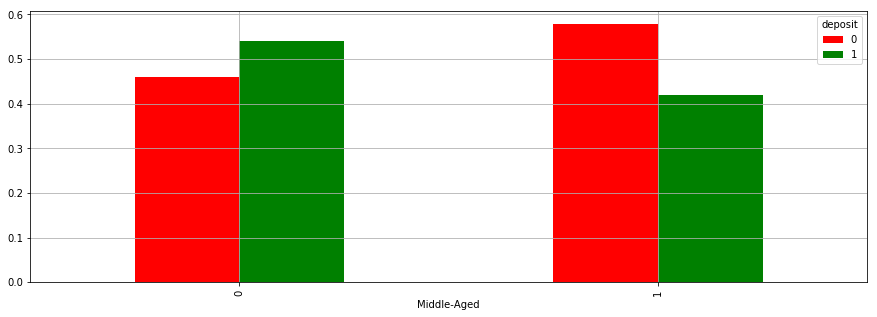

In [66]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Middle-Aged'], bank_data.deposit)
print "Cross Tab Data is : "
print crosstab_data

print "Visualizing the Result : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* The data points suggest that middle aged people have a lesser response to term deposit offer.

Cross Tab Data is : 
deposit         0         1
Old                        
0        0.546299  0.453701
1        0.178396  0.821604
Visualizing the Result : 


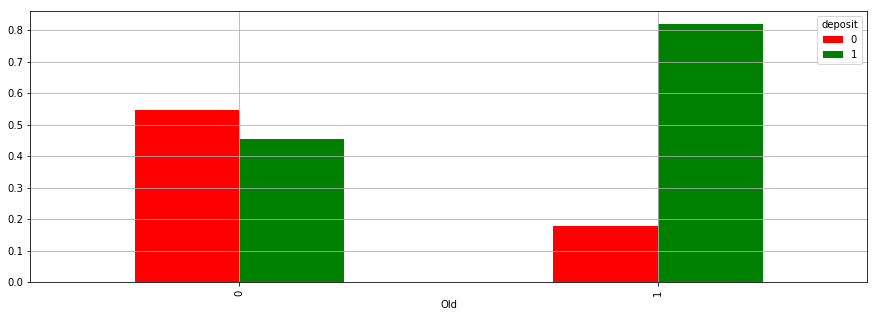

In [67]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Old'], bank_data.deposit)
print "Cross Tab Data is : "
print crosstab_data

print "Visualizing the Result : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* Here the Data Points reveal that Old and Retired people have a higher proportion of response to term deposit offer as 
compared to Adult or Middle-Aged people.

Cross Tab Data is : 
deposit             0        1
five_minutes                  
0             0.52582  0.47418
1             1.00000  0.00000
Visualizing the Result : 


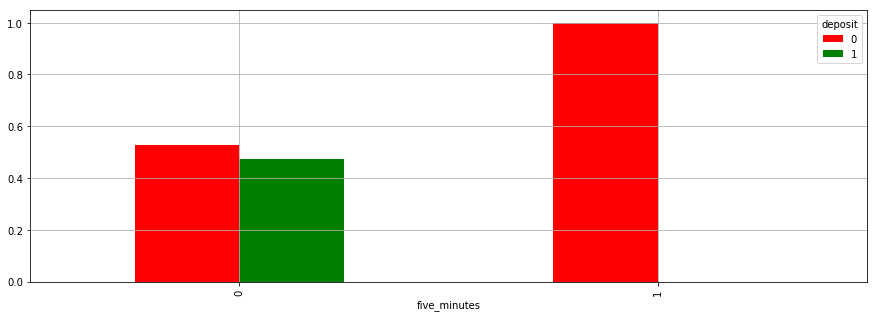

In [68]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['five_minutes'], bank_data.deposit)

print "Cross Tab Data is : "
print crosstab_data

print "Visualizing the Result : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference: 
* Customers who spoke less than 5 minutes are not interested in accepting the term deposit offer.

Cross Tab analysis is : 
deposit                          0         1
Between five and ten min                    
0                         0.523518  0.476482
1                         0.984375  0.015625
Visualizing the cross tab data : 


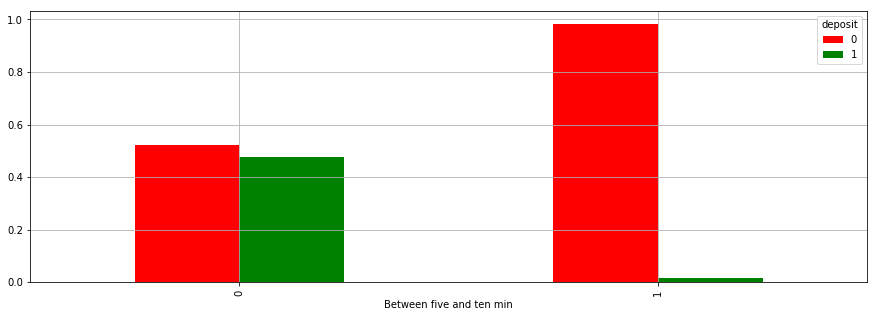

In [69]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Between five and ten min'], bank_data.deposit)

print "Cross Tab analysis is : "
print crosstab_data

print "Visualizing the cross tab data : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference: 
* This shows that customers who are slightly interested in accepting the term deposit offer, speak for 5 to 10 mins.

Cross Tab Analysis of the Data is : 
deposit                  no       yes
More than ten min                    
0                  0.986111  0.013889
1                  0.523174  0.476826
Visualizing the same result : 


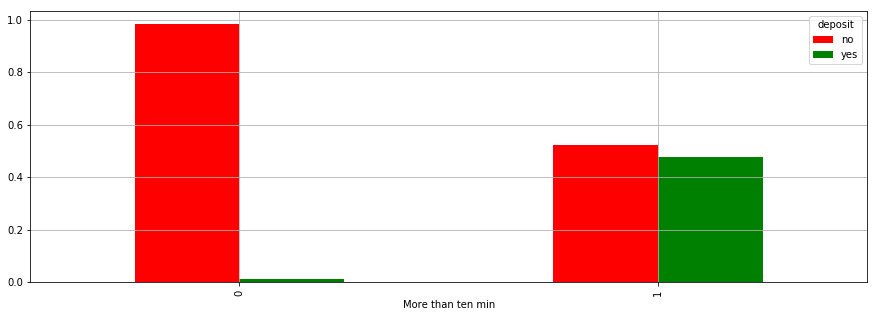

In [81]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['More than ten min'], bank_data.deposit)

print "Cross Tab Analysis of the Data is : "
print crosstab_data

print "Visualizing the same result : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* As the customer starts speaking for more than ten minutes, this shows that the customer is very much interested in accepting the term deposit offer.

Cross Tab Data Results are : 
deposit                    no       yes
pdays_not_contacted                    
0                    0.328753  0.671247
1                    0.593465  0.406535
Visualizing the same results : 


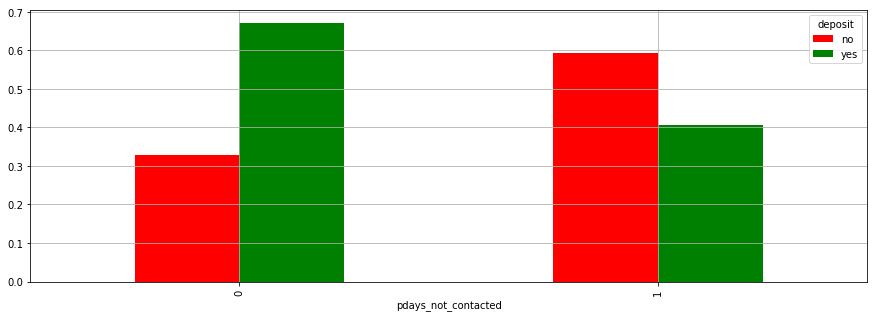

In [82]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['pdays_not_contacted'], bank_data.deposit)

print "Cross Tab Data Results are : "
print crosstab_data

print "Visualizing the same results : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* Customers who were not contacted in the previous campaign and are willing to respond to term deposit offer, represent 40% of the total customers.

Cross Tab Analysis of the Data is : 
deposit              no       yes
months_passed                    
-0.033333      0.593465  0.406535
 1.000000      0.352381  0.647619
 2.000000      0.264906  0.735094
 3.000000      0.375241  0.624759
Visualizing the same results : 


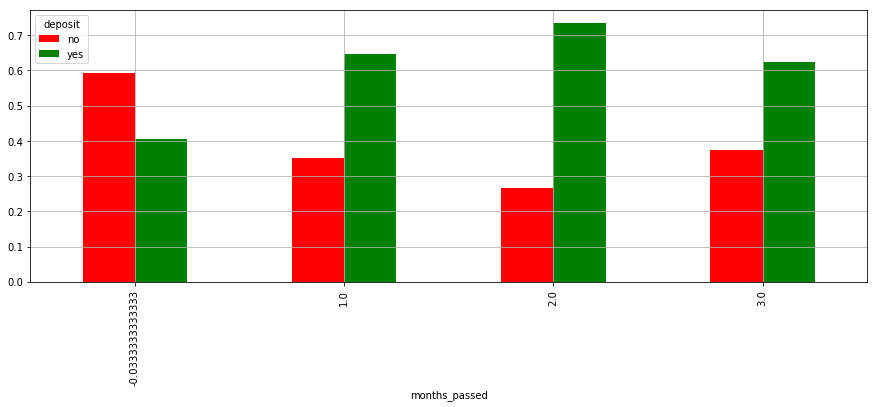

In [83]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['months_passed'], bank_data.deposit)

print "Cross Tab Analysis of the Data is : "
print crosstab_data

print "Visualizing the same results : "
data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
--> The Inference from this data is:
* When the customers are not contacted at all, the percentage of response to term deposit offer is just 40%.
* As the customers are contacted between 0 to 2 months, the response increases to 65%.
* Between 2 to 6 months, the percentage of response is 75%.
* As we move beyond 6 months, the percentage of response reduces to 62%.

Crosstab Data is : 
deposit          no       yes
Contacted                    
0          0.550979  0.449021
1          0.179625  0.820375
Visualizing the Result : 


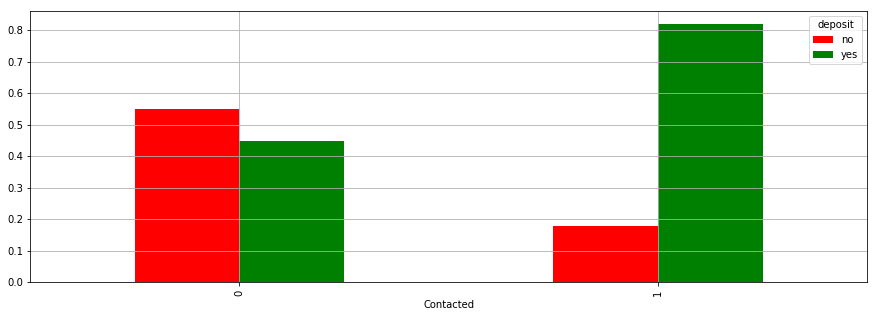

In [90]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Contacted'], bank_data.deposit)

print "Crosstab Data is : "
print crosstab_data

print "Visualizing the Result : "
data_prep.visualize_crosstab_data(crosstab_data)

In [91]:
## Inference: The data points refers to the no. of contact for a client has been contacted before this campaign.
# Fewer no. of contacts are more likely to enroll for term deposit

Cross Tab Data is : 
deposit            no       yes
Neg_Balance                    
0            0.515085  0.484915
1            0.694767  0.305233
Visualizing the result : 


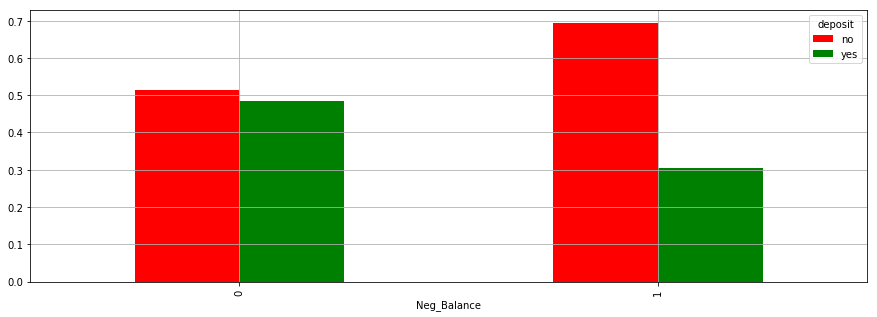

In [92]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Neg_Balance'], bank_data.deposit)

print "Cross Tab Data is : "
print crosstab_data

print "Visualizing the result : "
data_prep.visualize_crosstab_data(crosstab_data)

deposit           no       yes
No_Balance                    
0           0.518964  0.481036
1           0.622739  0.377261


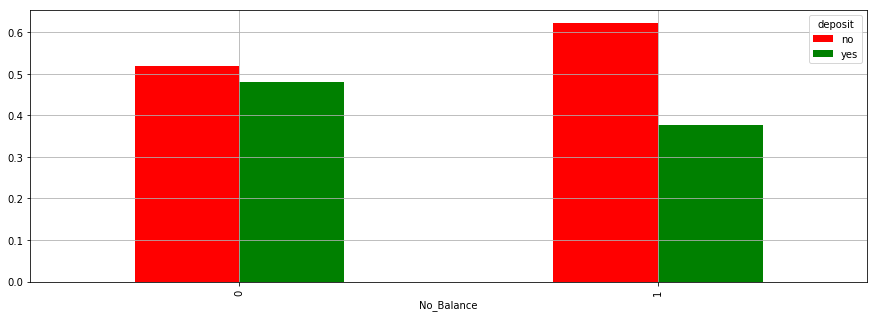

In [94]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['No_Balance'], bank_data.deposit)

print crosstab_data

data_prep.visualize_crosstab_data(crosstab_data)

deposit            no       yes
Pos_Balance                    
0            0.656635  0.343365
1            0.630222  0.369778
2            0.542361  0.457639
3            0.496292  0.503708
4            0.424571  0.575429
5            0.407895  0.592105


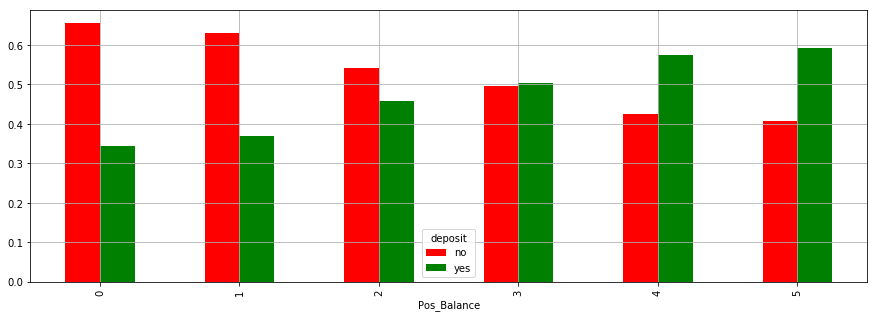

In [95]:
crosstab_data = data_prep.perform_crosstab_analysis(bank_data['Pos_Balance'], bank_data.deposit)

print crosstab_data

data_prep.visualize_crosstab_data(crosstab_data)

### Inference:
* As the Balance keeps increasing, the responses to the term deposit offers also increase.